In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import os

In [2]:
# Get CSV file
zoo = pd.read_csv(os.path.join('..','Resources', 'zoo.csv'))
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,class
0,Aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,Adder,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3,Reptile
2,Alcatrazes Tree Frog,0,0,1,0,0,1,0,0,1,1,0,0,4,0,0,0,5,Amphibian
3,Alligator,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3,Reptile
4,Amazon River Dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
208,Woolly Monkey,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1,Mammal
209,Worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,Invertebrate
210,Wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2,Bird


In [3]:
zoo_df=zoo.set_index('animal_name')
zoo_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,class
animal_name,,,,,,,,,,,,,,,,,,
Aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
Adder,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3,Reptile
Alcatrazes Tree Frog,0,0,1,0,0,1,0,0,1,1,0,0,4,0,0,0,5,Amphibian
Alligator,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3,Reptile
Amazon River Dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
Woolly Monkey,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1,Mammal
Worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,Invertebrate


In [4]:
# Data Summary
zoo_df["class"].value_counts()


Mammal          59
Bird            40
Fish            28
Bug             25
Reptile         24
Invertebrate    20
Amphibian       16
Name: class, dtype: int64

In [5]:
# Data for predictions
kangaroo = np.array([[1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1]])
bald_eagle = np.array([[0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0]])
rattle_snake = np.array([[0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,]])
goldfish = np.array([[0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0]])
mountain_chicken_frog = np.array([[0,0,1,0,0,1,1,0,1,1,0,0,4,0,0,0]])
vampire_moth = np.array([[0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0]])
coral = np.array([[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]])
sea_turtle = np.array([[0,0,1,0,0,1,1,0,1,0,0,1,4,1,0,1]])

In [6]:
# Assign X and y
X = zoo_df.drop(["class_type","class"], axis=1)
y = zoo_df["class_type"]
print (X.shape, y.shape)

(212, 16) (212,)


In [7]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


#### Run chi square test on training/testing data sets

In [8]:
# Run chi-squared test to look for statistical significance between overall data set, and training and testing data sets
#Get counts of values in training and testing sets
y_train_df = pd.DataFrame(y_train)
y_train_counts_df = pd.DataFrame(y_train_df.value_counts())

y_test_df = pd.DataFrame(y_test)
y_test_counts_df = pd.DataFrame(y_test_df.value_counts())
y_test_counts_df

#Get counts of values for overall zoo dataset
zoo_counts_train_df = pd.DataFrame((zoo_df["class_type"].value_counts()*0.75)).astype(int)
zoo_counts_train_df = zoo_counts_train_df.rename(columns= {"class_type": "count"})
zoo_counts_train_df.index.names = ["class_type"]
zoo_counts_test_df = pd.DataFrame((zoo_df["class_type"].value_counts()*0.25)).astype(int)
zoo_counts_test_df = zoo_counts_test_df.rename(columns= {"class_type": "count"})
zoo_counts_test_df.index.names = ["class_type"]

# Merge counts into training dataframe and testing dataframe
merged_training_df = pd.merge(y_train_counts_df, zoo_counts_train_df, on="class_type")
merged_training_df = merged_training_df.rename(columns= {0:"Actual", "count":"Expected"})

merged_testing_df = pd.merge(y_test_counts_df, zoo_counts_test_df, on="class_type")
merged_testing_df = merged_testing_df.rename(columns= {0:"Actual", "count":"Expected"})

In [9]:
# Find critical value
# With 7 rows, the degree of freedom is 6
# With a p-value of 0.05, the confidence level is 1.00 - 0.05 = 0.95
critical_value = stats.chi2.ppf(q = 0.95, df = 6)
critical_value


12.591587243743977

In [10]:
merged_training_df

,Actual,Expected
class_type,,
1,41,44
2,30,30
4,22,21
3,20,18
6,19,18
7,14,15
5,13,12


In [11]:
merged_testing_df

,Actual,Expected
class_type,,
1,18,14
2,10,10
7,6,5
6,6,6
4,6,7
3,4,6
5,3,4


In [12]:
# Run the chi square test on training data
stats.chisquare(merged_training_df['Actual'], merged_training_df['Expected'])

Power_divergenceResult(statistic=0.67994227994228, pvalue=0.9949137443848849)

In [13]:
# Run the chi square test on testing data
stats.chisquare(merged_testing_df['Actual'], merged_testing_df['Expected'])

Power_divergenceResult(statistic=2.4023809523809523, pvalue=0.8792288299268616)

### Feature Selection

Explanation and Code from https://machinelearningmastery.com/feature-selection-with-categorical-data/

#### Chi-Squared

In [14]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

fs_chi = SelectKBest(score_func=chi2, k='all')
fit_chi = fs_chi.fit(X_train, y_train)

# Create dataframe with results
chi_scores_df = pd.DataFrame(fit_chi.scores_)
chi_columns_df = pd.DataFrame(X.columns)

features_df = pd.concat([chi_columns_df, chi_scores_df], axis=1)
features_df.columns = ["Feature", "Score"]
features_df = features_df.sort_values(by=['Score'], ascending=False)
features_df

,Feature,Score
12,legs,149.602969
1,feathers,129.000000
3,milk,118.000000
11,fins,110.924953
0,hair,87.764159
4,airborne,80.176164
7,toothed,56.201040
5,aquatic,50.629805
2,eggs,38.121241
13,tail,36.173774


#### Mutual Information

In [15]:
MI_fs = SelectKBest(score_func=mutual_info_classif, k='all')
MI_fs_fit = MI_fs.fit(X_train, y_train)
X_train_MI_fs = MI_fs.transform(X_train)
X_test_MI_fs = MI_fs.transform(X_test)

#Create dataframe with results
MI_scores_df = pd.DataFrame(MI_fs_fit.scores_)
MI_columns_df = pd.DataFrame(X.columns)

MI_features_df = pd.concat([MI_columns_df, MI_scores_df], axis=1)
MI_features_df.columns = ["Feature", "Score"]
MI_features_df = MI_features_df.sort_values(by=['Score'], ascending=False)
MI_features_df

,Feature,Score
12,legs,1.032987
3,milk,0.632456
1,feathers,0.498735
2,eggs,0.472852
8,backbone,0.460027
7,toothed,0.442618
9,breathes,0.437841
11,fins,0.434658
13,tail,0.421383
0,hair,0.390136


### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=500)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [17]:
print(f"Training score: {classifier.score(X_train, y_train)}")
print(f"Testing score: {classifier.score(X_test, y_test)}")

Training score: 0.9748427672955975
Testing score: 0.9245283018867925


In [18]:
print(f"Predictions")
print(f"Kangaroo: {classifier.predict(kangaroo)}")
print(f"Bald Eagle: {classifier.predict(bald_eagle)}")
print(f"Rattle Snake: {classifier.predict(rattle_snake)}")
print(f"Goldfish: {classifier.predict(goldfish)}")
print(f"Mountain Chicken Frog: {classifier.predict(mountain_chicken_frog)}")
print(f"Vampire Moth: {classifier.predict(vampire_moth)}")
print(f"Coral: {classifier.predict(coral)}")
print(f"Sea Turtle: {classifier.predict(sea_turtle)}")

Predictions
Kangaroo: [1]
Bald Eagle: [2]
Rattle Snake: [3]
Goldfish: [4]
Mountain Chicken Frog: [5]
Vampire Moth: [6]
Coral: [7]
Sea Turtle: [4]


In [19]:
predictions_logreg = classifier.predict(X_test)
class_predictions_table = pd.DataFrame({"Prediction": predictions_logreg, "Actual": y_test})
class_predictions_table.head()

,Prediction,Actual
animal_name,,
Crow,2,2
Toad,5,5
Dragonfly,6,6
Kiwi,2,2
Chub,4,4


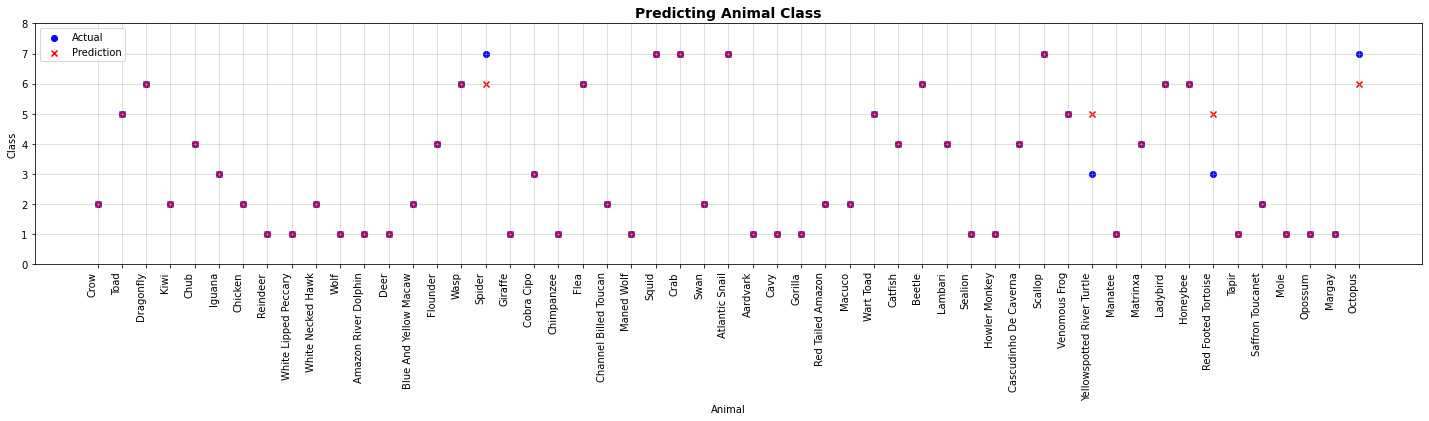

In [20]:
#Create the scatter plot of actual and predictions
fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.ylim(0, 8)
plt.xticks(rotation=90, ha='right')

plt.scatter(class_predictions_table.index, class_predictions_table.Actual, marker='o', color='b', label='Actual')
plt.scatter(class_predictions_table.index, class_predictions_table.Prediction, marker='x', color='r', label='Prediction')

plt.title('Predicting Animal Class',color='k', size=14, weight='bold')
plt.xlabel("Animal")
plt.ylabel('Class')
plt.legend(loc="best")
plt.grid(alpha=0.5)

# plt.savefig('../resources/logreg.png', dpi=fig.dpi)
plt.show()


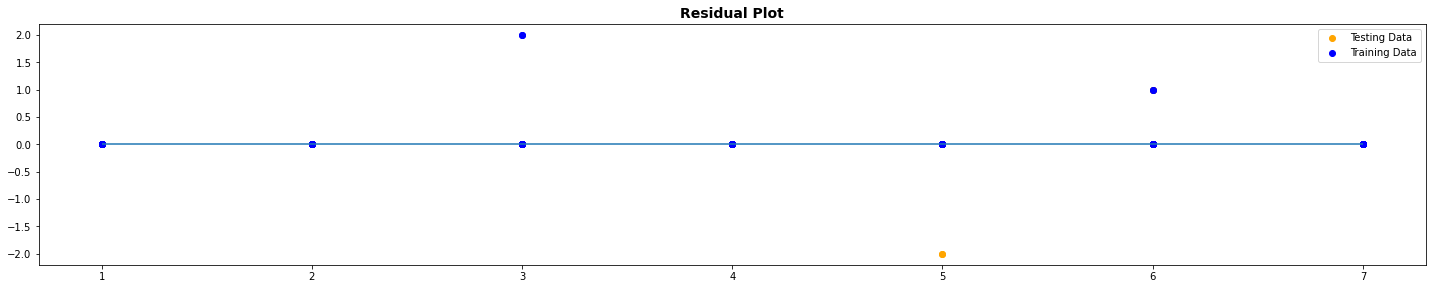

In [21]:
#Plot Residuals
xtest_shaped = predictions_logreg.reshape(-1, 1)
ytest_shaped = y_test.values.reshape(-1,1)

xtrain = classifier.predict(X_train)
xtrain_shaped = xtrain.reshape(-1, 1)
ytrain_shaped = y_train.values.reshape(-1,1)

fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)

plt.scatter(xtest_shaped, ytest_shaped - xtest_shaped, c="orange", label="Testing Data")
plt.scatter(xtrain_shaped, ytrain_shaped - xtrain_shaped, c="blue", label="Training Data")
plt.legend()
plt.hlines(y=0, xmin=xtest_shaped.min(), xmax=xtest_shaped.max())
plt.title('Residual Plot',color='k', size=14, weight='bold')

# plt.savefig('../resources/residual.png', dpi=fig.dpi)
plt.show()

In [22]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_logreg))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         6
           5       0.60      1.00      0.75         3
           6       0.75      1.00      0.86         6
           7       1.00      0.67      0.80         6

    accuracy                           0.92        53
   macro avg       0.91      0.88      0.87        53
weighted avg       0.95      0.92      0.92        53



#### Logistic Regression Scaled

In [23]:
# Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
classifier_scaled = LogisticRegression(max_iter=500)
classifier_scaled.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [25]:
print(f"Training score: {classifier_scaled.score(X_train_scaled, y_train)}")
print(f"Testing score: {classifier_scaled.score(X_test_scaled, y_test)}")

Training score: 0.9811320754716981
Testing score: 0.9433962264150944


In [26]:
print(f"Predictions")
print(f"Kangaroo: {classifier_scaled.predict(kangaroo)}")
print(f"Bald Eagle: {classifier_scaled.predict(bald_eagle)}")
print(f"Rattle Snake: {classifier_scaled.predict(rattle_snake)}")
print(f"Goldfish: {classifier_scaled.predict(goldfish)}")
print(f"Mountain Chicken Frog: {classifier_scaled.predict(mountain_chicken_frog)}")
print(f"Vampire Moth: {classifier_scaled.predict(vampire_moth)}")
print(f"Coral: {classifier_scaled.predict(coral)}")
print(f"Sea Turtle: {classifier_scaled.predict(sea_turtle)}")

Predictions
Kangaroo: [1]
Bald Eagle: [2]
Rattle Snake: [3]
Goldfish: [4]
Mountain Chicken Frog: [6]
Vampire Moth: [6]
Coral: [7]
Sea Turtle: [6]


In [27]:
predictions_logreg_scaled = classifier_scaled.predict(X_test)
class_predictions_table_scaled = pd.DataFrame({"Prediction": predictions_logreg_scaled, "Actual": y_test})
class_predictions_table_scaled.head()

,Prediction,Actual
animal_name,,
Crow,2,2
Toad,5,5
Dragonfly,6,6
Kiwi,2,2
Chub,4,4


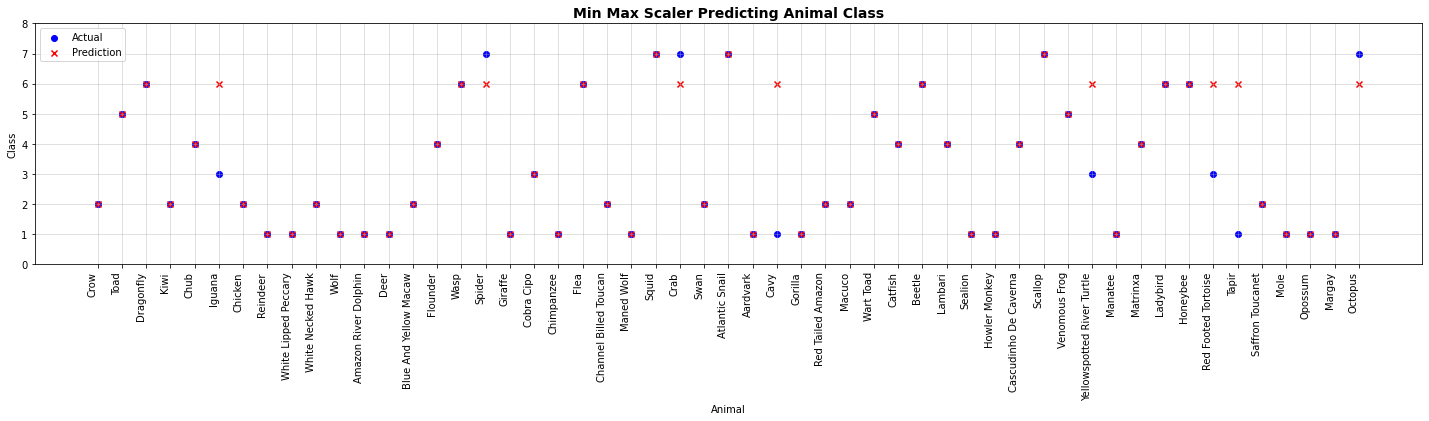

In [28]:
#Create the scatter plot of actual and predictions
fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)

plt.ylim(0, 8)
plt.xticks(rotation=90, ha='right')
plt.scatter(class_predictions_table_scaled.index, class_predictions_table_scaled.Actual, marker='o', color='b', label='Actual')
plt.scatter(class_predictions_table_scaled.index, class_predictions_table_scaled.Prediction, marker='x', color='r', label='Prediction')
plt.title('Min Max Scaler Predicting Animal Class',color='k', size=14, weight='bold')
plt.xlabel("Animal")
plt.ylabel('Class')
plt.legend(loc="best")
plt.grid(alpha=0.5)

# plt.savefig('../resources/minmaxlogreg.png', dpi=fig.dpi)
plt.show()

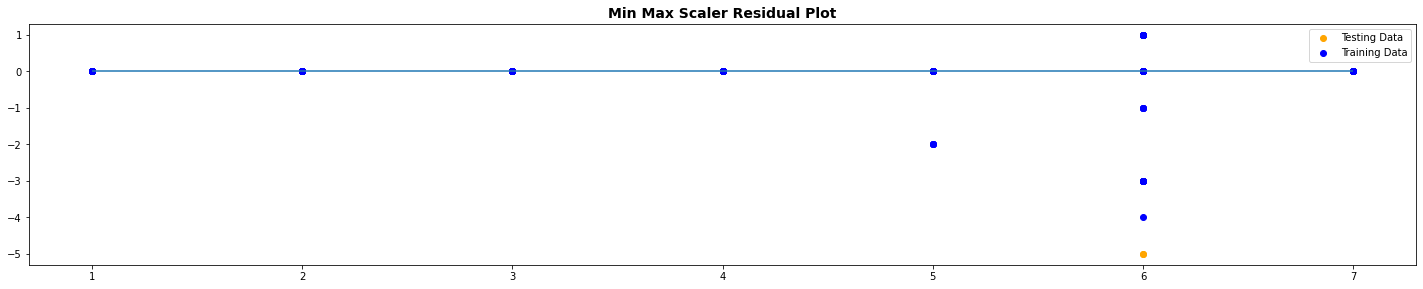

In [29]:
#Plot Residuals
xtest_shaped = predictions_logreg_scaled.reshape(-1, 1)
ytest_shaped = y_test.values.reshape(-1,1)

xtrain = classifier_scaled.predict(X_train)
xtrain_shaped = xtrain.reshape(-1, 1)
ytrain_shaped = y_train.values.reshape(-1,1)

fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)

plt.scatter(xtest_shaped, ytest_shaped - xtest_shaped, c="orange", label="Testing Data")
plt.scatter(xtrain_shaped, ytrain_shaped - xtrain_shaped, c="blue", label="Training Data")
plt.legend()
plt.hlines(y=0, xmin=xtest_shaped.min(), xmax=xtest_shaped.max())
plt.title('Min Max Scaler Residual Plot',color='k', size=14, weight='bold')

# plt.savefig('../resources/minmaxresidual.png', dpi=fig.dpi)
plt.show()

In [30]:
# Classification Report
print(classification_report(y_test, predictions_logreg_scaled))

              precision    recall  f1-score   support

           1       1.00      0.89      0.94        18
           2       1.00      1.00      1.00        10
           3       1.00      0.25      0.40         4
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         3
           6       0.43      1.00      0.60         6
           7       1.00      0.50      0.67         6

    accuracy                           0.85        53
   macro avg       0.92      0.81      0.80        53
weighted avg       0.94      0.85      0.85        53



### Random Forest 

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf = rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9874213836477987

In [32]:
print(f"Training score: {rf.score(X_train, y_train)}")
print(f"Testing score: {rf.score(X_test, y_test)}")

Training score: 0.9874213836477987
Testing score: 0.9433962264150944


In [33]:
print(f"Predictions")
print(f"Kangaroo: {rf.predict(kangaroo)}")
print(f"Bald Eagle: {rf.predict(bald_eagle)}")
print(f"Rattle Snake: {rf.predict(rattle_snake)}")
print(f"Goldfish: {rf.predict(goldfish)}")
print(f"Mountain Chicken Frog: {rf.predict(mountain_chicken_frog)}")
print(f"Vampire Moth: {rf.predict(vampire_moth)}")
print(f"Coral: {rf.predict(coral)}")
print(f"Sea Turtle: {rf.predict(sea_turtle)}")

Predictions
Kangaroo: [1]
Bald Eagle: [2]
Rattle Snake: [3]
Goldfish: [4]
Mountain Chicken Frog: [5]
Vampire Moth: [6]
Coral: [7]
Sea Turtle: [4]


In [34]:
predictions_rf = rf.predict(X_test)
rf_predictions_table = pd.DataFrame({"Prediction": predictions_rf, "Actual": y_test})
rf_predictions_table.head()

,Prediction,Actual
animal_name,,
Crow,2,2
Toad,5,5
Dragonfly,6,6
Kiwi,2,2
Chub,4,4


In [35]:
importances_rf = rf.feature_importances_
importances_rf

array([0.05043101, 0.13214343, 0.09574155, 0.12851652, 0.0574231 ,
       0.05094072, 0.01786701, 0.03114549, 0.08249056, 0.06332152,
       0.01237101, 0.08420153, 0.10598958, 0.0689107 , 0.00315151,
       0.01535474])

In [36]:
# Classification Report
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         6
           5       0.60      1.00      0.75         3
           6       0.86      1.00      0.92         6
           7       1.00      0.83      0.91         6

    accuracy                           0.94        53
   macro avg       0.92      0.90      0.89        53
weighted avg       0.96      0.94      0.94        53



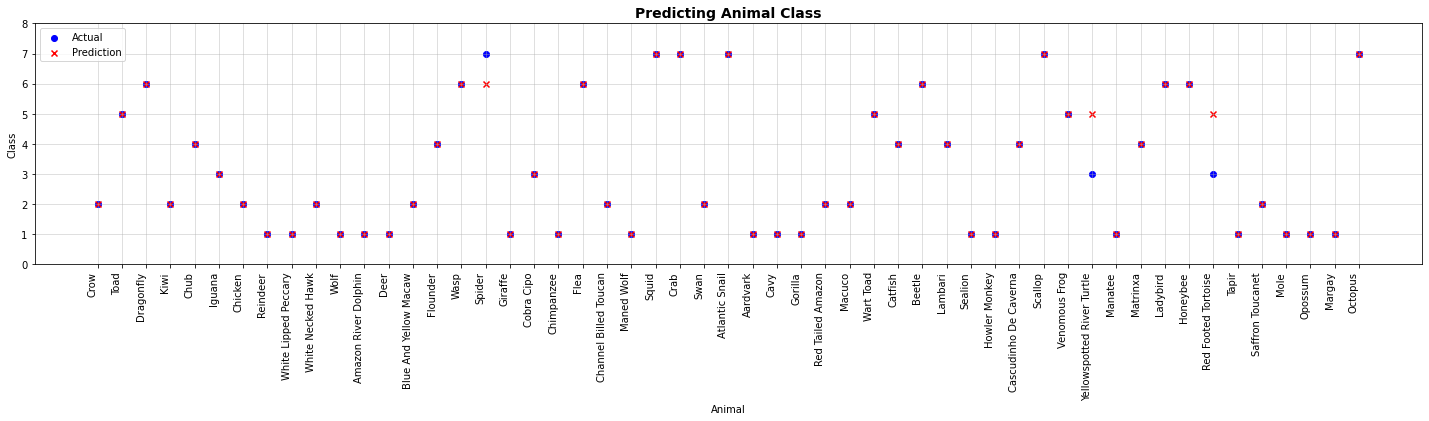

In [37]:
#Create the scatter plot of actual and predictions
fig_rf = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.ylim(0, 8)
plt.xticks(rotation=90, ha='right')

plt.scatter(rf_predictions_table.index, rf_predictions_table.Actual, marker='o', color='b', label='Actual')
plt.scatter(rf_predictions_table.index, rf_predictions_table.Prediction, marker='x', color='r', label='Prediction')

plt.title('Predicting Animal Class',color='k', size=14, weight='bold')
plt.xlabel("Animal")
plt.ylabel('Class')
plt.legend(loc="best")
plt.grid(alpha=0.5)

# plt.savefig('../resources/rf.png', dpi=fig_rf.dpi)
plt.show()


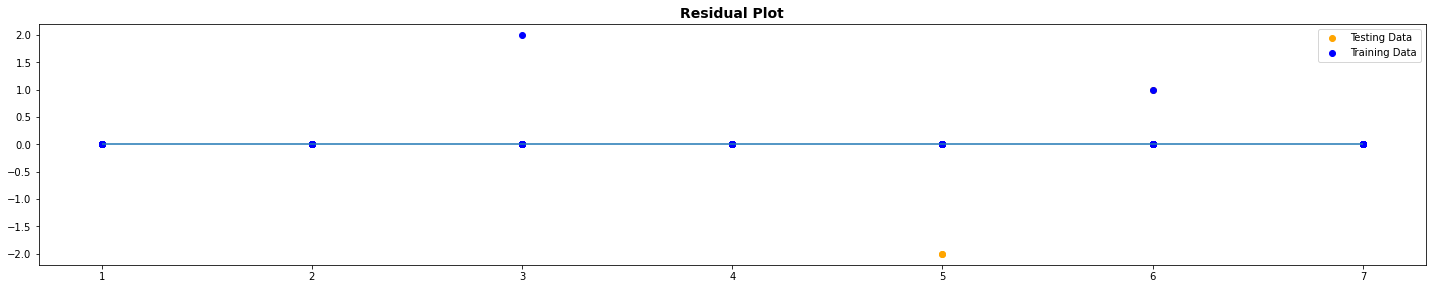

In [38]:
#Plot Residuals
rf_xtest_shaped = predictions_rf.reshape(-1, 1)
rf_ytest_shaped = y_test.values.reshape(-1,1)

rf_xtrain = rf.predict(X_train)
rf_xtrain_shaped = rf_xtrain.reshape(-1, 1)
rf_ytrain_shaped = y_train.values.reshape(-1,1)

rf_res_fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)

plt.scatter(rf_xtest_shaped, rf_ytest_shaped - rf_xtest_shaped, c="orange", label="Testing Data")
plt.scatter(rf_xtrain_shaped, rf_ytrain_shaped - rf_xtrain_shaped, c="blue", label="Training Data")
plt.legend()
plt.hlines(y=0, xmin=rf_xtest_shaped.min(), xmax=rf_xtest_shaped.max())
plt.title('Residual Plot',color='k', size=14, weight='bold')

# plt.savefig('../resources/rf_residual.png', dpi=rf_res_fig.dpi)
plt.show()

#### Random Forest Scaled

In [39]:
rf_scaled = RandomForestClassifier(n_estimators=50)
rf_scaled = rf_scaled.fit(X_train_scaled, y_train)
rf_scaled.score(X_train_scaled, y_train)

0.9874213836477987

In [40]:
print(f"Training score: {rf_scaled.score(X_train_scaled, y_train)}")
print(f"Testing score: {rf_scaled.score(X_test_scaled, y_test)}")

Training score: 0.9874213836477987
Testing score: 0.9433962264150944


In [41]:
print(f"Predictions")
print(f"Kangaroo: {rf_scaled.predict(kangaroo)}")
print(f"Bald Eagle: {rf_scaled.predict(bald_eagle)}")
print(f"Rattle Snake: {rf_scaled.predict(rattle_snake)}")
print(f"Goldfish: {rf_scaled.predict(goldfish)}")
print(f"Mountain Chicken Frog: {rf_scaled.predict(mountain_chicken_frog)}")
print(f"Vampire Moth: {rf_scaled.predict(vampire_moth)}")
print(f"Coral: {rf_scaled.predict(coral)}")
print(f"Sea Turtle: {rf_scaled.predict(sea_turtle)}")

Predictions
Kangaroo: [1]
Bald Eagle: [2]
Rattle Snake: [3]
Goldfish: [4]
Mountain Chicken Frog: [5]
Vampire Moth: [6]
Coral: [7]
Sea Turtle: [4]


In [42]:
predictions_rf_scaled = rf_scaled.predict(X_test)
rf_scaled_predictions_table = pd.DataFrame({"Prediction": predictions_rf_scaled, "Actual": y_test})
rf_scaled_predictions_table.head()

,Prediction,Actual
animal_name,,
Crow,2,2
Toad,5,5
Dragonfly,6,6
Kiwi,2,2
Chub,4,4


In [43]:
# Classification Report
print(classification_report(y_test, predictions_rf_scaled))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         6
           5       0.60      1.00      0.75         3
           6       0.86      1.00      0.92         6
           7       1.00      0.83      0.91         6

    accuracy                           0.94        53
   macro avg       0.92      0.90      0.89        53
weighted avg       0.96      0.94      0.94        53



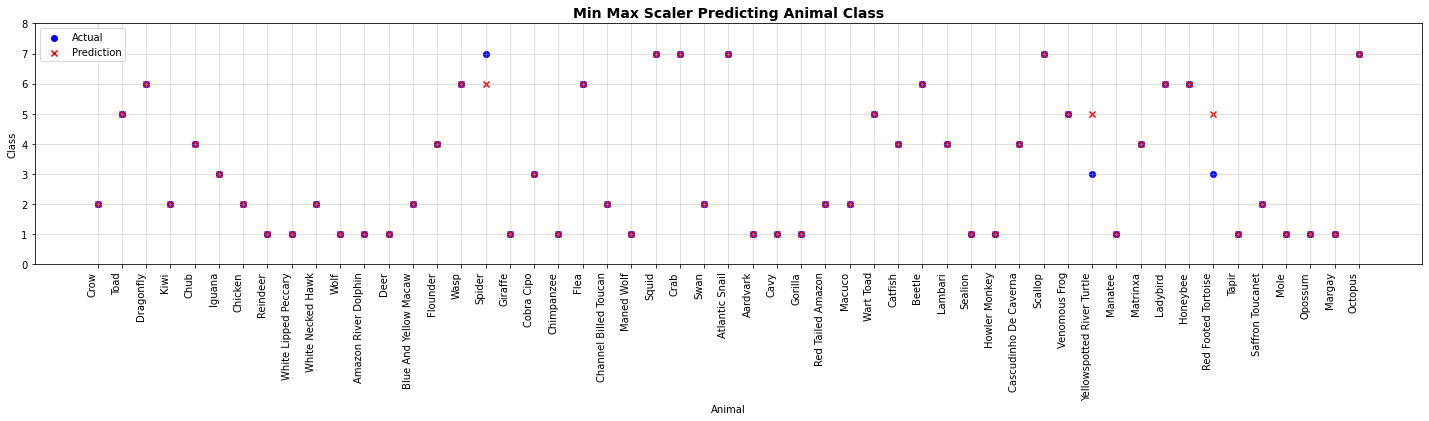

In [44]:
#Create the scatter plot of actual and predictions
rf_scaled_fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.ylim(0, 8)
plt.xticks(rotation=90, ha='right')

plt.scatter(rf_scaled_predictions_table.index, rf_scaled_predictions_table.Actual, marker='o', color='b', label='Actual')
plt.scatter(rf_scaled_predictions_table.index, rf_scaled_predictions_table.Prediction, marker='x', color='r', label='Prediction')
plt.title('Min Max Scaler Predicting Animal Class',color='k', size=14, weight='bold')
plt.xlabel("Animal")
plt.ylabel('Class')
plt.legend(loc="best")
plt.grid(alpha=0.5)

# plt.savefig('../resources/rf_minmax.png', dpi=rf_scaled_fig.dpi)
plt.show()

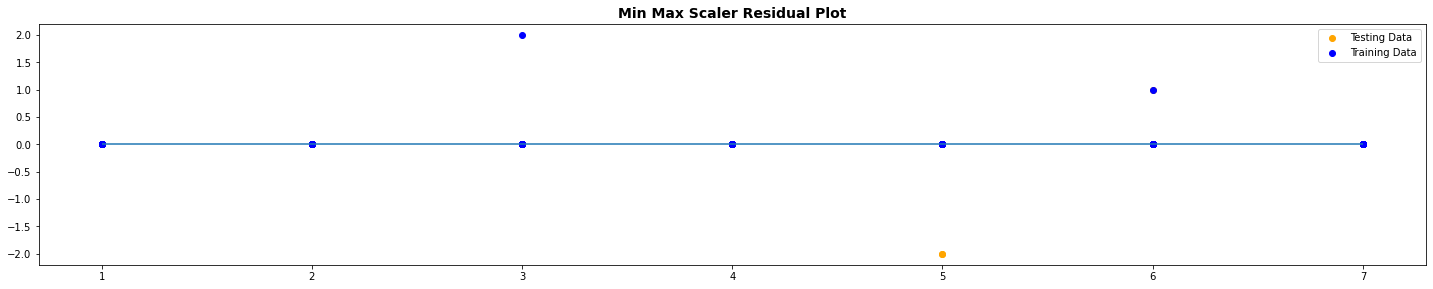

In [45]:
#Plot Residuals
rf_scaled_xtest_shaped = predictions_rf_scaled.reshape(-1, 1)
rf_scaled_ytest_shaped = y_test.values.reshape(-1,1)

rf_scaled_xtrain = rf_scaled.predict(X_train)
rf_scaled_xtrain_shaped = rf_scaled_xtrain.reshape(-1, 1)
rf_scaled_ytrain_shaped = y_train.values.reshape(-1,1)

rf_scaled_res_fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)

plt.scatter(rf_scaled_xtest_shaped, rf_scaled_ytest_shaped - rf_scaled_xtest_shaped, c="orange", label="Testing Data")
plt.scatter(rf_scaled_xtrain_shaped, rf_scaled_ytrain_shaped - rf_scaled_xtrain_shaped, c="blue", label="Training Data")
plt.legend()
plt.hlines(y=0, xmin=rf_scaled_xtest_shaped.min(), xmax=rf_scaled_xtest_shaped.max())
plt.title('Min Max Scaler Residual Plot',color='k', size=14, weight='bold')

# plt.savefig('../resources/rf_minmax_residual.png', dpi=rf_scaled_res_fig.dpi)
plt.show()

### K Nearest Neighbor

In [46]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 0.987/0.962
k: 3, Train/Test Score: 0.956/0.943
k: 5, Train/Test Score: 0.962/0.943
k: 7, Train/Test Score: 0.918/0.925
k: 9, Train/Test Score: 0.912/0.887
k: 11, Train/Test Score: 0.918/0.887
k: 13, Train/Test Score: 0.906/0.887
k: 15, Train/Test Score: 0.899/0.849
k: 17, Train/Test Score: 0.899/0.849
k: 19, Train/Test Score: 0.836/0.830


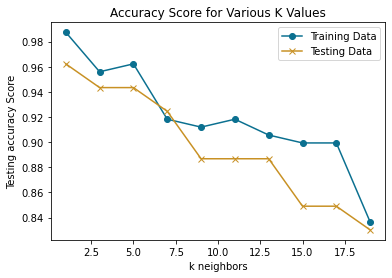

In [47]:
plt.plot(range(1, 20, 2), train_scores, marker='o', color='#0b7090')
plt.plot(range(1, 20, 2), test_scores, marker="x", color='#c89124')
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.title("Accuracy Score for Various K Values")
plt.legend(['Training Data', 'Testing Data'])
#plt.savefig('../resources/knn_kscores.png', dpi=fig.dpi)
plt.show()

In [48]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print('k=11 Train Acc: %.3f' % knn.score(X_train, y_train))
print('k=11 Test Acc: %.3f' % knn.score(X_test, y_test))

k=11 Train Acc: 0.918
k=11 Test Acc: 0.887


In [49]:
print(f"Predictions")
print(f"Kangaroo: {knn.predict(kangaroo)}")
print(f"Bald Eagle: {knn.predict(bald_eagle)}")
print(f"Rattle Snake: {knn.predict(rattle_snake)}")
print(f"Goldfish: {knn.predict(goldfish)}")
print(f"Mountain Chicken Frog: {knn.predict(mountain_chicken_frog)}")
print(f"Vampire Moth: {knn.predict(vampire_moth)}")
print(f"Coral: {knn.predict(coral)}")
print(f"Sea Turtle: {knn.predict(sea_turtle)}")

Predictions
Kangaroo: [1]
Bald Eagle: [2]
Rattle Snake: [3]
Goldfish: [4]
Mountain Chicken Frog: [5]
Vampire Moth: [6]
Coral: [7]
Sea Turtle: [3]


In [50]:
predictions_knn = knn.predict(X_test)
knn_predictions_table = pd.DataFrame({"Prediction": predictions_knn, "Actual": y_test})
knn_predictions_table.head()

,Prediction,Actual
animal_name,,
Crow,2,2
Toad,5,5
Dragonfly,6,6
Kiwi,2,2
Chub,4,4


In [51]:
# Classification Report
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67         4
           4       0.86      1.00      0.92         6
           5       0.50      1.00      0.67         3
           6       0.75      1.00      0.86         6
           7       1.00      0.50      0.67         6

    accuracy                           0.89        53
   macro avg       0.87      0.85      0.82        53
weighted avg       0.93      0.89      0.88        53



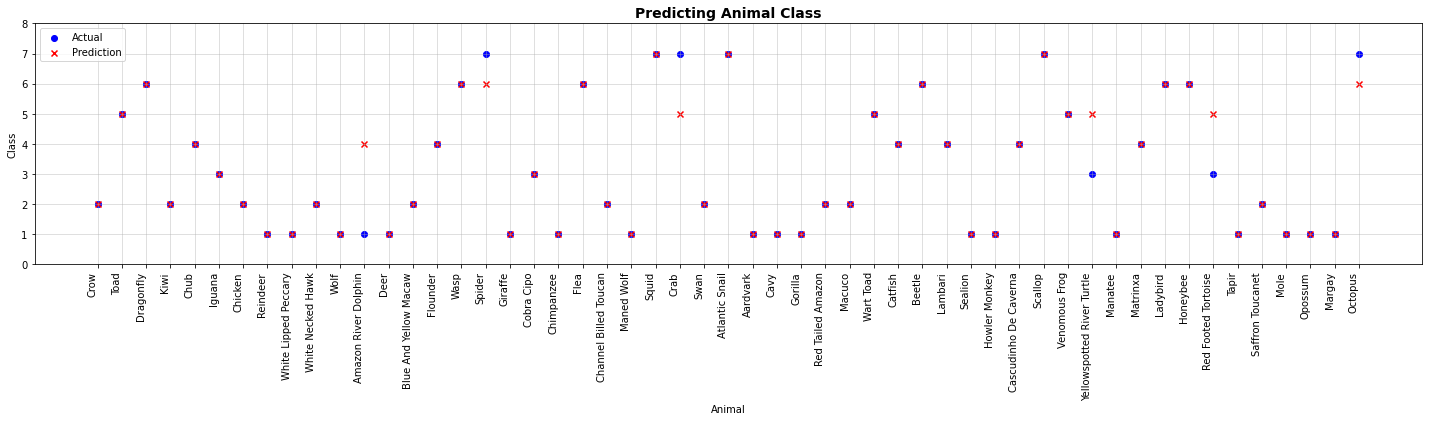

In [52]:
#Create the scatter plot of actual and predictions
knn_fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.ylim(0, 8)
plt.xticks(rotation=90, ha='right')

plt.scatter(knn_predictions_table.index, knn_predictions_table.Actual, marker='o', color='b', label='Actual')
plt.scatter(knn_predictions_table.index, knn_predictions_table.Prediction, marker='x', color='r', label='Prediction')

plt.title('Predicting Animal Class',color='k', size=14, weight='bold')
plt.xlabel("Animal")
plt.ylabel('Class')
plt.legend(loc="best")
plt.grid(alpha=0.5)

# plt.savefig('../resources/knn.png', dpi=knn_fig.dpi)
plt.show()


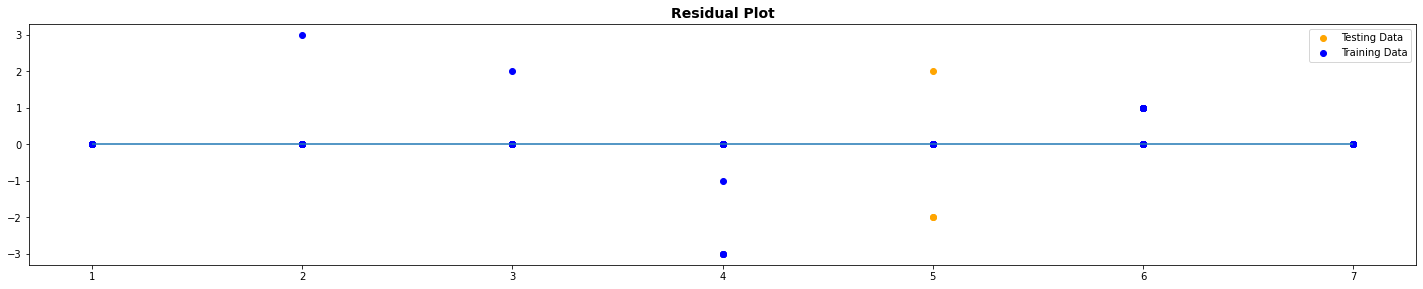

In [53]:
#Plot Residuals
knn_xtest_shaped = predictions_knn.reshape(-1, 1)
knn_ytest_shaped = y_test.values.reshape(-1,1)

knn_xtrain = knn.predict(X_train)
knn_xtrain_shaped = knn_xtrain.reshape(-1, 1)
knn_ytrain_shaped = y_train.values.reshape(-1,1)

knn_res_fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)

plt.scatter(knn_xtest_shaped, knn_ytest_shaped - knn_xtest_shaped, c="orange", label="Testing Data")
plt.scatter(knn_xtrain_shaped, knn_ytrain_shaped - knn_xtrain_shaped, c="blue", label="Training Data")
plt.legend()
plt.hlines(y=0, xmin=knn_xtest_shaped.min(), xmax=knn_xtest_shaped.max())
plt.title('Residual Plot',color='k', size=14, weight='bold')

# plt.savefig('../resources/knn_residual.png', dpi=knn_res_fig.dpi)
plt.show()

#### K Nearest Neighbor Scaled

In [54]:
train_scores_scaled = []
test_scores_scaled = []
for k in range(1, 20, 2):
    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)
    train_score_scaled = knn_scaled.score(X_train_scaled, y_train)
    test_score_scaled = knn_scaled.score(X_test_scaled, y_test)
    train_scores_scaled.append(train_score_scaled)
    test_scores_scaled.append(test_score_scaled)
    print(f"k: {k}, Train/Test Score: {train_score_scaled:.3f}/{test_score_scaled:.3f}")

k: 1, Train/Test Score: 0.987/0.962
k: 3, Train/Test Score: 0.969/0.943
k: 5, Train/Test Score: 0.962/0.943
k: 7, Train/Test Score: 0.950/0.943
k: 9, Train/Test Score: 0.937/0.887
k: 11, Train/Test Score: 0.931/0.906
k: 13, Train/Test Score: 0.918/0.906
k: 15, Train/Test Score: 0.906/0.906
k: 17, Train/Test Score: 0.931/0.925
k: 19, Train/Test Score: 0.925/0.906


In [55]:
knn_scaled = KNeighborsClassifier(n_neighbors=11)
knn_scaled.fit(X_train_scaled, y_train)
print('k=11 Train Acc: %.3f' % knn_scaled.score(X_train_scaled, y_train))
print('k=11 Test Acc: %.3f' % knn_scaled.score(X_test_scaled, y_test))

k=11 Train Acc: 0.931
k=11 Test Acc: 0.906


In [56]:
print(f"Predictions")
print(f"Kangaroo: {knn_scaled.predict(kangaroo)}")
print(f"Bald Eagle: {knn_scaled.predict(bald_eagle)}")
print(f"Rattle Snake: {knn_scaled.predict(rattle_snake)}")
print(f"Goldfish: {knn_scaled.predict(goldfish)}")
print(f"Mountain Chicken Frog: {knn_scaled.predict(mountain_chicken_frog)}")
print(f"Vampire Moth: {knn_scaled.predict(vampire_moth)}")
print(f"Coral: {knn_scaled.predict(coral)}")
print(f"Sea Turtle: {knn_scaled.predict(sea_turtle)}")

Predictions
Kangaroo: [1]
Bald Eagle: [2]
Rattle Snake: [3]
Goldfish: [4]
Mountain Chicken Frog: [7]
Vampire Moth: [6]
Coral: [7]
Sea Turtle: [3]


In [57]:
# Classification Report
predictions_knn_scaled = knn_scaled.predict(X_test_scaled)
print(classification_report(y_test, predictions_knn_scaled))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67         4
           4       0.86      1.00      0.92         6
           5       0.60      1.00      0.75         3
           6       0.75      1.00      0.86         6
           7       1.00      0.67      0.80         6

    accuracy                           0.91        53
   macro avg       0.89      0.87      0.85        53
weighted avg       0.93      0.91      0.90        53



In [58]:
predictions_knn_scaled = knn_scaled.predict(X_test)
knn_scaled_predictions_table = pd.DataFrame({"Prediction": predictions_knn_scaled, "Actual": y_test})
knn_scaled_predictions_table.head()

,Prediction,Actual
animal_name,,
Crow,2,2
Toad,5,5
Dragonfly,6,6
Kiwi,2,2
Chub,4,4


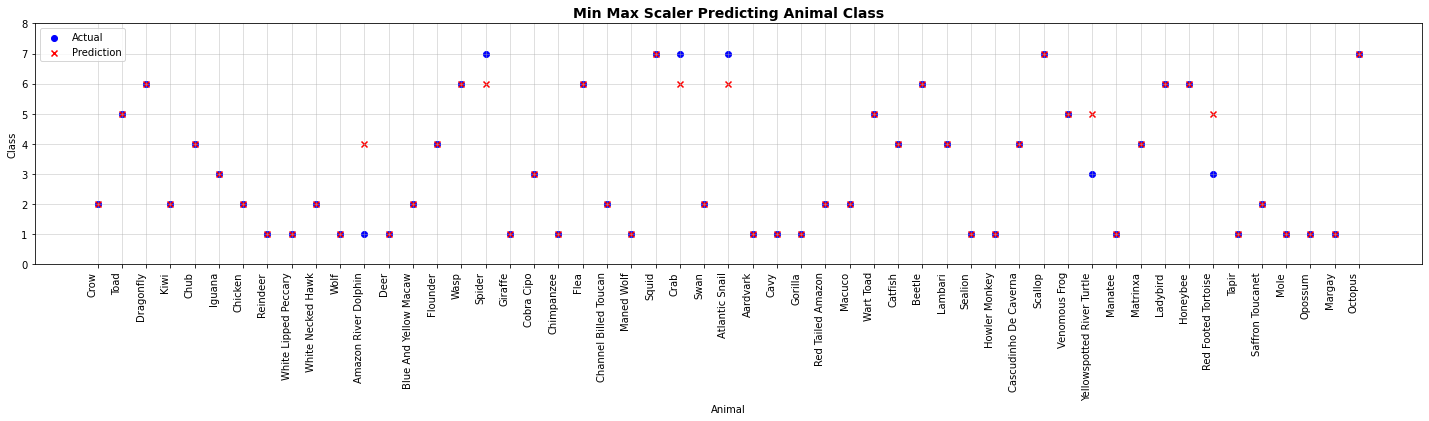

In [59]:
#Create the scatter plot of actual and predictions
knn_scaled_fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)

plt.ylim(0, 8)
plt.xticks(rotation=90, ha='right')
plt.scatter(knn_scaled_predictions_table.index, knn_scaled_predictions_table.Actual, marker='o', color='b', label='Actual')
plt.scatter(knn_scaled_predictions_table.index, knn_scaled_predictions_table.Prediction, marker='x', color='r', label='Prediction')
plt.title('Min Max Scaler Predicting Animal Class',color='k', size=14, weight='bold')
plt.xlabel("Animal")
plt.ylabel('Class')
plt.legend(loc="best")
plt.grid(alpha=0.5)

# plt.savefig('../resources/knn_scaled.png', dpi=knn_scaled_fig.dpi)
plt.show()

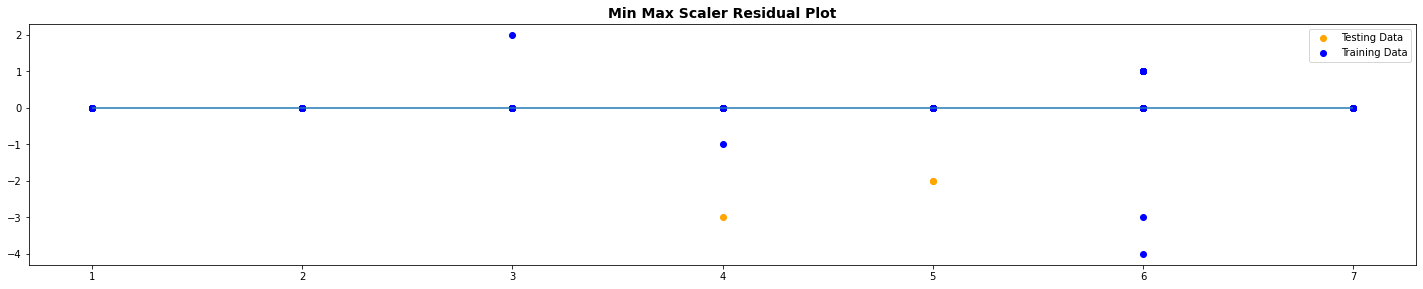

In [60]:
#Plot Residuals
knn_scaled_xtest_shaped = predictions_knn_scaled.reshape(-1, 1)
knn_scaled_ytest_shaped = y_test.values.reshape(-1,1)

knn_scaled_xtrain = knn_scaled.predict(X_train)
knn_scaled_xtrain_shaped = knn_scaled_xtrain.reshape(-1, 1)
knn_scaled_ytrain_shaped = y_train.values.reshape(-1,1)

knn_scaled_res_fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)

plt.scatter(knn_scaled_xtest_shaped, knn_scaled_ytest_shaped - knn_scaled_xtest_shaped, c="orange", label="Testing Data")
plt.scatter(knn_scaled_xtrain_shaped, knn_scaled_ytrain_shaped - knn_scaled_xtrain_shaped, c="blue", label="Training Data")
plt.legend()
plt.hlines(y=0, xmin=knn_scaled_xtest_shaped.min(), xmax=knn_scaled_xtest_shaped.max())
plt.title('Min Max Scaler Residual Plot',color='k', size=14, weight='bold')

# plt.savefig('../resources/knn_scaled_residual.png', dpi=knn_scaled_res_fig.dpi)
plt.show()

### Support Vector Machine

In [61]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

print('Train Acc: %.3f' % svm_model.score(X_train, y_train))
print('Test Acc: %.3f' % svm_model.score(X_test, y_test))

Train Acc: 0.981
Test Acc: 0.943


In [62]:
predictions_svm = svm_model.predict(X_test)
print(classification_report(y_test, predictions_svm,
                            target_names=["1","2","3","4","5","6","7"]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         6
           5       0.60      1.00      0.75         3
           6       0.86      1.00      0.92         6
           7       1.00      0.83      0.91         6

    accuracy                           0.94        53
   macro avg       0.92      0.90      0.89        53
weighted avg       0.96      0.94      0.94        53



In [63]:
#Train the parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid_svm = GridSearchCV(svm_model, param_grid, verbose=3)

grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.938, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=1.000, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.906, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.969, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.935, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.938, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=1, gamma=0.005, score=1.000, total=   0.0s
[CV] C=1, gamma=0.005 ................................................
[CV] .................... C=1, gamma=0.005, score=0.906, total=   0.0s
[CV] C=1, gamma=0.005 ................................................
[CV] .................... C=1, gamma=0.005, score=0.969, total=   0.0s
[CV] C=1, gamma=0.005 ................................................
[CV] .................... C=1, gamma=0.005, score=0.935, total=   0.0s
[CV] C=5, gamma=0.0001 ...............................................
[CV] ................... C=5, gamma=0.0001, score=0.938, total=   0.0s
[CV] C=5, gamma=0.0001 ...............................................
[CV] ................... C=5, gamma=0.0001, score=0.969, total=   0.0s
[CV] C=5, gamma=0.0001 ...............................................
[CV] ................... C=5, gamma=0.0001, score=0.875, total=   0.0s
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[CV] ................... C=50, gamma=0.005, score=0.969, total=   0.0s
[CV] C=50, gamma=0.005 ...............................................
[CV] ................... C=50, gamma=0.005, score=0.875, total=   0.0s
[CV] C=50, gamma=0.005 ...............................................
[CV] ................... C=50, gamma=0.005, score=0.969, total=   0.0s
[CV] C=50, gamma=0.005 ...............................................
[CV] ................... C=50, gamma=0.005, score=0.968, total=   0.0s


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.9s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [64]:
print(grid_svm.best_params_)
print(grid_svm.best_score_)


{'C': 1, 'gamma': 0.0001}
0.9495967741935484


In [65]:
print(f"Predictions")
print(f"Kangaroo: {svm_model.predict(kangaroo)}")
print(f"Bald Eagle: {svm_model.predict(bald_eagle)}")
print(f"Rattle Snake: {svm_model.predict(rattle_snake)}")
print(f"Goldfish: {svm_model.predict(goldfish)}")
print(f"Mountain Chicken Frog: {svm_model.predict(mountain_chicken_frog)}")
print(f"Vampire Moth: {svm_model.predict(vampire_moth)}")
print(f"Coral: {svm_model.predict(coral)}")
print(f"Sea Turtle: {svm_model.predict(sea_turtle)}")

Predictions
Kangaroo: [1]
Bald Eagle: [2]
Rattle Snake: [3]
Goldfish: [4]
Mountain Chicken Frog: [5]
Vampire Moth: [6]
Coral: [7]
Sea Turtle: [3]


In [66]:
svm_predictions_table = pd.DataFrame({"Prediction": predictions_svm, "Actual": y_test})
svm_predictions_table.head()

,Prediction,Actual
animal_name,,
Crow,2,2
Toad,5,5
Dragonfly,6,6
Kiwi,2,2
Chub,4,4


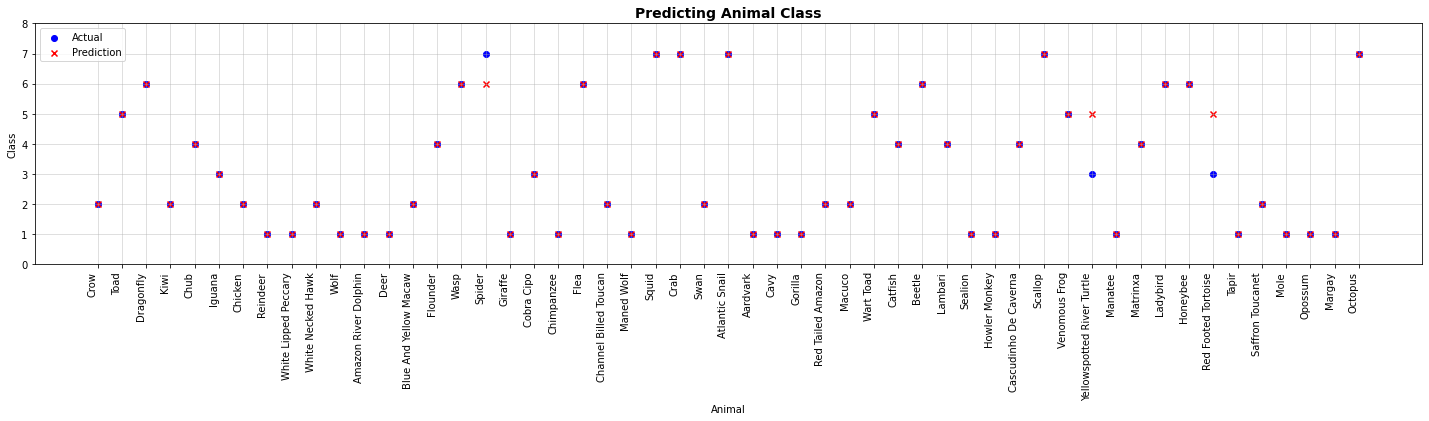

In [67]:
#Create the scatter plot of actual and predictions
svm_fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.ylim(0, 8)
plt.xticks(rotation=90, ha='right')

plt.scatter(svm_predictions_table.index, svm_predictions_table.Actual, marker='o', color='b', label='Actual')
plt.scatter(svm_predictions_table.index, svm_predictions_table.Prediction, marker='x', color='r', label='Prediction')

plt.title('Predicting Animal Class',color='k', size=14, weight='bold')
plt.xlabel("Animal")
plt.ylabel('Class')
plt.legend(loc="best")
plt.grid(alpha=0.5)

# plt.savefig('../resources/svm.png', dpi=svm_fig.dpi)
plt.show()

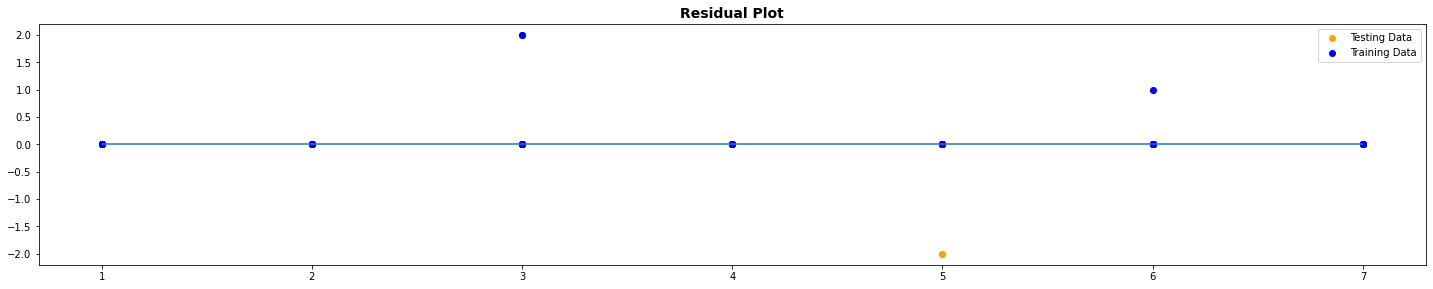

In [68]:
#Plot Residuals
svm_xtest_shaped = predictions_svm.reshape(-1, 1)
svm_ytest_shaped = y_test.values.reshape(-1,1)

svm_xtrain = svm_model.predict(X_train)
svm_xtrain_shaped = svm_xtrain.reshape(-1, 1)
svm_ytrain_shaped = y_train.values.reshape(-1,1)

svm_res_fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)

plt.scatter(svm_xtest_shaped, svm_ytest_shaped - svm_xtest_shaped, c="orange", label="Testing Data")
plt.scatter(svm_xtrain_shaped, svm_ytrain_shaped - svm_xtrain_shaped, c="blue", label="Training Data")
plt.legend()
plt.hlines(y=0, xmin=svm_xtest_shaped.min(), xmax=svm_xtest_shaped.max())
plt.title('Residual Plot',color='k', size=14, weight='bold')

# plt.savefig('../resources/svm_res.png', dpi=svm_res_fig.dpi)
plt.show()

#### Support Vector Machine Scaled

In [69]:
svm_model_scaled = SVC(kernel='linear')
svm_model_scaled.fit(X_train_scaled, y_train)

print('Train Acc: %.3f' % svm_model_scaled.score(X_train_scaled, y_train))
print('Test Acc: %.3f' % svm_model_scaled.score(X_test_scaled, y_test))

Train Acc: 0.969
Test Acc: 0.943


In [70]:
predictions_svm_scaled = svm_model_scaled.predict(X_test_scaled)
print(classification_report(y_test, predictions_svm_scaled,
                            target_names=["1","2","3","4","5","6","7"]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         6
           5       0.60      1.00      0.75         3
           6       0.86      1.00      0.92         6
           7       1.00      0.83      0.91         6

    accuracy                           0.94        53
   macro avg       0.92      0.90      0.89        53
weighted avg       0.96      0.94      0.94        53



In [71]:
#Train the parameters
param_grid_scaled = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid_svm_scaled = GridSearchCV(svm_model, param_grid, verbose=3)

grid_svm_scaled.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.969, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.938, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.875, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.969, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.935, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.969, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.005 ................................................
[CV] .................... C=1, gamma=0.005, score=0.935, total=   0.0s
[CV] C=5, gamma=0.0001 ...............................................
[CV] ................... C=5, gamma=0.0001, score=0.938, total=   0.0s
[CV] C=5, gamma=0.0001 ...............................................
[CV] ................... C=5, gamma=0.0001, score=0.969, total=   0.0s
[CV] C=5, gamma=0.0001 ...............................................
[CV] ................... C=5, gamma=0.0001, score=0.938, total=   0.0s
[CV] C=5, gamma=0.0001 ...............................................
[CV] ................... C=5, gamma=0.0001, score=0.969, total=   0.0s
[CV] C=5, gamma=0.0001 ...............................................
[CV] ................... C=5, gamma=0.0001, score=0.968, total=   0.0s
[CV] C=5, gamma=0.0005 ...............................................
[CV] ................... C=5, gamma=0.0005, score=0.938, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.5s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [72]:
print(grid_svm_scaled.best_params_)
print(grid_svm_scaled.best_score_)

{'C': 5, 'gamma': 0.0001}
0.9560483870967742


In [73]:
print(f"Predictions")
print(f"Kangaroo: {svm_model_scaled.predict(kangaroo)}")
print(f"Bald Eagle: {svm_model_scaled.predict(bald_eagle)}")
print(f"Rattle Snake: {svm_model_scaled.predict(rattle_snake)}")
print(f"Goldfish: {svm_model_scaled.predict(goldfish)}")
print(f"Mountain Chicken Frog: {svm_model_scaled.predict(mountain_chicken_frog)}")
print(f"Vampire Moth: {svm_model_scaled.predict(vampire_moth)}")
print(f"Coral: {svm_model_scaled.predict(coral)}")
print(f"Sea Turtle: {svm_model_scaled.predict(sea_turtle)}")

Predictions
Kangaroo: [1]
Bald Eagle: [2]
Rattle Snake: [3]
Goldfish: [4]
Mountain Chicken Frog: [5]
Vampire Moth: [6]
Coral: [7]
Sea Turtle: [3]


In [74]:
svm_scaled_predictions_table = pd.DataFrame({"Prediction": predictions_svm_scaled, "Actual": y_test})
svm_scaled_predictions_table.head()

,Prediction,Actual
animal_name,,
Crow,2,2
Toad,5,5
Dragonfly,6,6
Kiwi,2,2
Chub,4,4


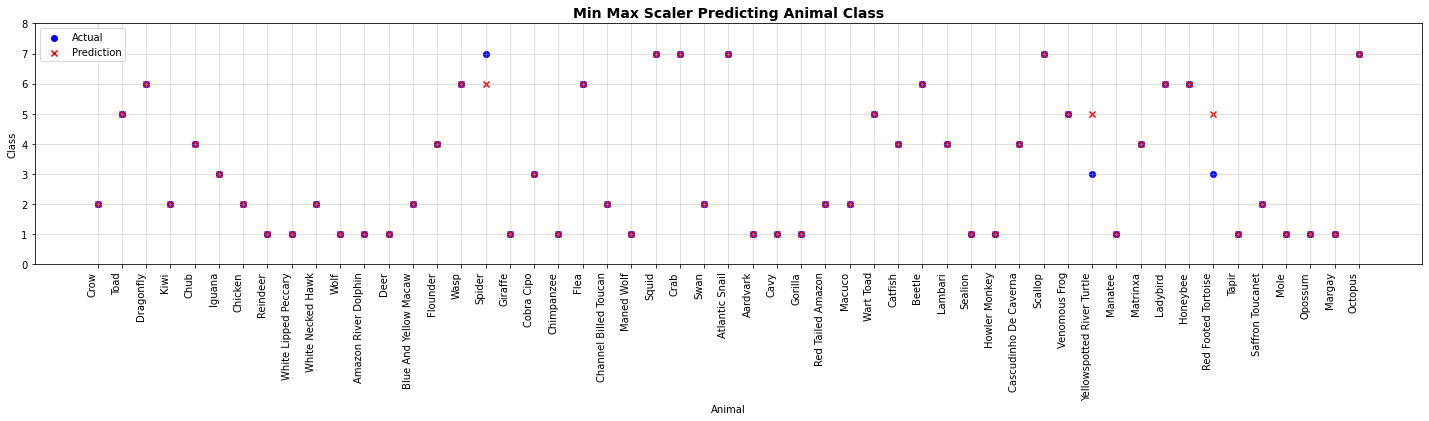

In [75]:
#Create the scatter plot of actual and predictions
svm_scaled_fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)

plt.ylim(0, 8)
plt.xticks(rotation=90, ha='right')
plt.scatter(svm_scaled_predictions_table.index, svm_scaled_predictions_table.Actual, marker='o', color='b', label='Actual')
plt.scatter(svm_scaled_predictions_table.index, svm_scaled_predictions_table.Prediction, marker='x', color='r', label='Prediction')
plt.title('Min Max Scaler Predicting Animal Class',color='k', size=14, weight='bold')
plt.xlabel("Animal")
plt.ylabel('Class')
plt.legend(loc="best")
plt.grid(alpha=0.5)

# plt.savefig('../resources/svm_scaled.png', dpi=svm_scaled_fig.dpi)
plt.show()

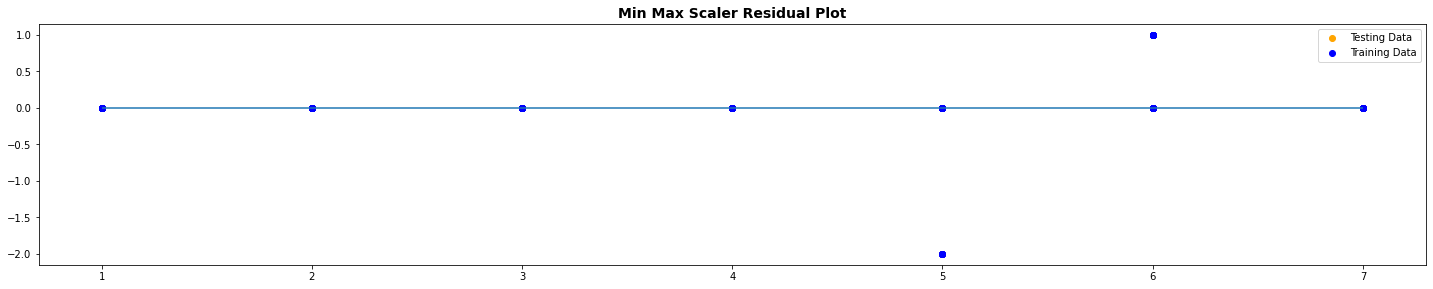

In [76]:
#Plot Residuals
svm_scaled_xtest_shaped = predictions_svm_scaled.reshape(-1, 1)
svm_scaled_ytest_shaped = y_test.values.reshape(-1,1)

svm_scaled_xtrain = svm_model_scaled.predict(X_train)
svm_scaled_xtrain_shaped = svm_scaled_xtrain.reshape(-1, 1)
svm_scaled_ytrain_shaped = y_train.values.reshape(-1,1)

svm_scaled_res_fig = plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.tight_layout()
plt.subplots_adjust(top=0.90)

plt.scatter(svm_scaled_xtest_shaped, svm_scaled_ytest_shaped - svm_scaled_xtest_shaped, c="orange", label="Testing Data")
plt.scatter(svm_scaled_xtrain_shaped, svm_scaled_ytrain_shaped - svm_scaled_xtrain_shaped, c="blue", label="Training Data")
plt.legend()
plt.hlines(y=0, xmin=svm_scaled_xtest_shaped.min(), xmax=svm_scaled_xtest_shaped.max())
plt.title('Min Max Scaler Residual Plot',color='k', size=14, weight='bold')

# plt.savefig('../resources/svm_scaled_res.png', dpi=svm_scaled_res_fig.dpi)
plt.show()